In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale as sk_scale
from sklearn.preprocessing import StandardScaler
from umap import UMAP

c:\Users\menno\anaconda3\envs\p311\Lib\site-packages\umap\distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
c:\Users\menno\anaconda3\envs\p311\Lib\site-packages\umap\distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
c:\Users\menno\anaconda3\envs\p311\Lib\site-packages\umap\distances.py:1086: NumbaDeprecatio

In [2]:
PATH = os.getcwd()
DATAPATH = os.path.join(PATH, "../data")
filenames = {
    "X_test": "test_in - Copy.csv",
    "X_train": "train_in - Copy.csv",
    "y_test": "test_out - Copy.csv",
    "y_train": "train_out - Copy.csv",
}


# Import all data files
X_train = pd.read_csv(os.path.join(DATAPATH, filenames["X_train"]), header=None)
y_train = pd.read_csv(
    os.path.join(DATAPATH, filenames["y_train"]), header=None, names=["digit"]
)
X_test = pd.read_csv(os.path.join(DATAPATH, filenames["X_test"]), header=None)
y_test = pd.read_csv(
    os.path.join(DATAPATH, filenames["y_test"]), header=None, names=["digit"]
)

In [30]:
def center_img(X, y, digit: int):
    """Calculate the center of the cloud in 256 dim space for `digit` using data `X` and labels `y`"""
    return X[y.digit == digit].mean()


def show_img(X, shape=(16, 16)):
    """Show image of digit in `X`. Specifying the `shape` is optional"""
    plt.figure()
    plt.imshow(X.to_numpy().reshape(shape), cmap="Greys")
    plt.show()


def dist(src, dst):
    """Calculate the distance between `src` and `dst` using norm 2 distance"""
    return np.sqrt(((src - dst) ** 2).sum())


def classify(X_test, X_train=X_train, y_train=y_train):
    """Classify all test cases in `X_test` using the training data `X_train` and labels `y_train`"""
    centers = [center_img(X_train, y_train, digit) for digit in range(10)]
    output = []
    for _, img in X_test.iterrows():
        distances = [dist(img, center) for center in centers]
        output.append(np.argmin(distances))
    return pd.DataFrame(output, columns=["digit"])


def accuraccy(y_test: pd.DataFrame, y_out: pd.DataFrame):
    return len(y_test[y_test.eq(y_out).digit]) / len(y_test)


def calculate_distances(X_test, X_train=X_train, y_train=y_train) -> pd.DataFrame:
    """Classify all test cases in `X_test` using the training data `X_train` and labels `y_train`"""
    centers = [center_img(X_train, y_train, digit) for digit in range(10)]
    output = []
    for _, img in X_test.iterrows():
        output.append([dist(img, center) for center in centers])
    return pd.DataFrame(output)


def classify_dist_ij(dist_ij: pd.DataFrame, y: pd.DataFrame):
    """Classify all test cases using the distance matrix generated in `calculate_distances`"""
    return dist_ij.apply(np.argmin, axis=1).copy()

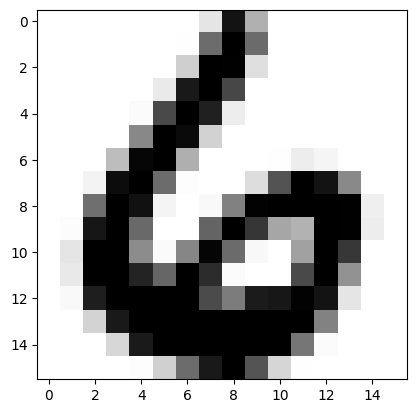

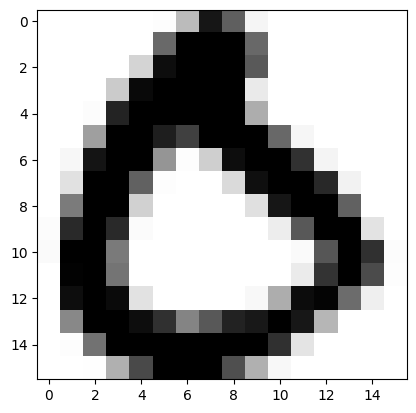

In [31]:
# Show first image in the training and test set to show data
show_img(X_train.iloc[0])
show_img(X_test.iloc[0])

# Task 1.1i: Calculate the centers

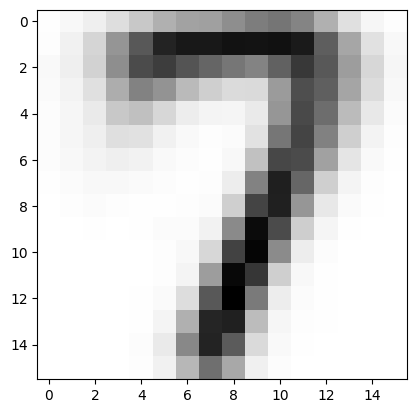

In [32]:
# Calculate center image of digits
center_7 = center_img(X_train, y_train, 7)
show_img(center_7)

# Task 1.1ii: Calculate the distances between the centers of the 10 clouds

In [33]:
centers = [center_img(X_train, y_train, digit) for digit in range(10)]
# Calculate all the distances for all possible combinations of centers
centers_dist = [
    dist(c1, c2)
    for i, c1 in enumerate(centers)
    for j, c2 in enumerate(centers)
    if i > j
]

# Task 1.1iii: What can you say about the expected accuraccy of the classifier?

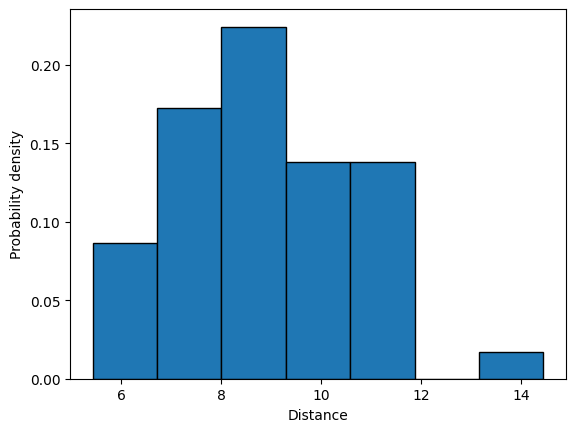

We see that most distances are in the range [25, 150].
We expect that the classification between centers is most difficult
 for those that have a distance that lays within this range.


In [34]:
plt.figure()
plt.hist(
    centers_dist,
    bins=int(2 * (len(centers_dist)) ** (1 / 3)),
    density=True,
    edgecolor="k",
)
plt.xlabel("Distance")
plt.ylabel("Probability density")
plt.show()
print(
    "We see that most distances are in the range [25, 150].\nWe expect that the classification between centers is most difficult\n for those that have a distance that lays within this range."
)

In [35]:
centers = [center_img(X_train, y_train, digit) for digit in range(10)]
dist_ij = np.array(
    [
        (i, j, np.round(dist(c1, c2), 3))
        for i, c1 in enumerate(centers)
        for j, c2 in enumerate(centers)
        if i > j
    ],
    dtype=[("digit1", int), ("digit2", int), ("distance", float)],
).T
print(np.sort(dist_ij, order="distance"))
print(
    "We see that the 9-7 and 9-4 pair are most difficult to separate,\n which is to be expected looking at the form of the digits."
)

[(9, 7,  5.426) (9, 4,  6.01 ) (5, 3,  6.119) (9, 8,  6.401)
 (6, 5,  6.699) (8, 5,  6.967) (8, 3,  7.02 ) (8, 2,  7.078)
 (6, 2,  7.332) (8, 4,  7.381) (5, 0,  7.519) (7, 4,  7.583)
 (5, 2,  7.907) (4, 2,  7.933) (5, 4,  8.002) (6, 0,  8.154)
 (3, 2,  8.178) (9, 5,  8.259) (9, 3,  8.354) (8, 7,  8.468)
 (8, 6,  8.587) (6, 4,  8.782) (7, 2,  8.873) (9, 2,  8.888)
 (7, 3,  8.922) (4, 3,  9.088) (3, 0,  9.144) (7, 5,  9.212)
 (6, 3,  9.302) (2, 0,  9.335) (8, 0,  9.908) (9, 1,  9.932)
 (8, 1, 10.087) (2, 1, 10.125) (4, 1, 10.174) (9, 6, 10.44 )
 (6, 1, 10.615) (7, 1, 10.743) (4, 0, 10.77 ) (7, 6, 10.888)
 (5, 1, 11.119) (9, 0, 11.489) (3, 1, 11.733) (7, 0, 11.865)
 (1, 0, 14.45 )]
We see that the 9-7 and 9-4 pair are most difficult to separate,
 which is to be expected looking at the form of the digits.


# Task 1.2i: PCA, U-MAP, T-SNE

In [36]:
def show_reducer_accuraccy(reducer, scaler, name):
    X_train_norm = StandardScaler().fit_transform(X_train)
    red_train = pd.DataFrame(reducer.fit_transform(X_train_norm))
    X_test_norm = scaler.fit_transform(X_test)
    red_test = pd.DataFrame(reducer.fit_transform(X_test_norm))
    y_out = classify(red_test, X_train=red_train)
    acc = accuraccy(y_test, y_out)
    centers = [center_img(red_train, y_train, digit) for digit in range(10)]
    print(f"The accuraccy with 2 component {name} is: {acc:.3f}")
    dist_ij = np.array(
        [
            (i, j, round(dist(c1, c2), 3))
            for i, c1 in enumerate(centers)
            for j, c2 in enumerate(centers)
            if i > j
        ],
        dtype=[("digit1", int), ("digit2", int), ("distance", float)],
    ).T
    print(np.sort(dist_ij, order="distance"))

    fig, axs = plt.subplots(1, 2, figsize=(16, 5), sharex=True, sharey=True)
    fig.suptitle(f"{name} visualisation")
    axs[0].set_title("Assigned labels")
    axs[0].set_xlabel(f"{name} component 0")
    axs[0].set_ylabel(f"{name} component 1")
    axs[1].set_title("True labels")
    axs[1].set_xlabel(f"{name} component 0")
    axs[1].set_ylabel(f"{name} component 1")

    for digit in range(10):
        axs[0].annotate(digit, centers[digit], size="large")
        axs[0].scatter(
            red_test.loc[y_out.digit == digit, 0],
            red_test.loc[y_out.digit == digit, 1],
            zorder=-1,
            alpha=0.7,
            label=f"{digit = }",
        )
        axs[1].annotate(digit, centers[digit], size="large")
        axs[1].scatter(
            red_test.loc[y_test.digit == digit, 0],
            red_test.loc[y_test.digit == digit, 1],
            zorder=-1,
            alpha=0.7,
            label=f"{digit = }",
        )

    axs[0].legend()
    axs[1].legend()
    plt.show()

The accuraccy with 2 component PCA is: 0.297
[(8, 4,  0.411) (5, 3,  1.687) (6, 2,  2.657) (9, 4,  2.821)
 (4, 3,  2.822) (8, 3,  2.914) (5, 2,  3.077) (9, 8,  3.127)
 (9, 7,  3.396) (3, 2,  3.756) (8, 2,  4.077) (8, 5,  4.169)
 (5, 4,  4.202) (4, 2,  4.38 ) (9, 3,  5.023) (6, 5,  5.463)
 (7, 4,  5.583) (8, 7,  5.979) (6, 3,  6.393) (8, 6,  6.451)
 (7, 3,  6.553) (9, 5,  6.655) (6, 4,  6.806) (9, 2,  7.197)
 (5, 0,  7.467) (7, 5,  8.201) (8, 1,  8.388) (2, 0,  8.529)
 (6, 0,  8.697) (4, 1,  8.7  ) (6, 1,  8.909) (2, 1,  9.057)
 (3, 0,  9.076) (9, 1,  9.412) (9, 6,  9.556) (7, 2,  9.732)
 (3, 1, 10.974) (5, 1, 11.506) (8, 0, 11.556) (4, 0, 11.64 )
 (7, 6, 12.303) (7, 1, 12.729) (9, 0, 14.099) (7, 0, 15.127)
 (1, 0, 17.395)]


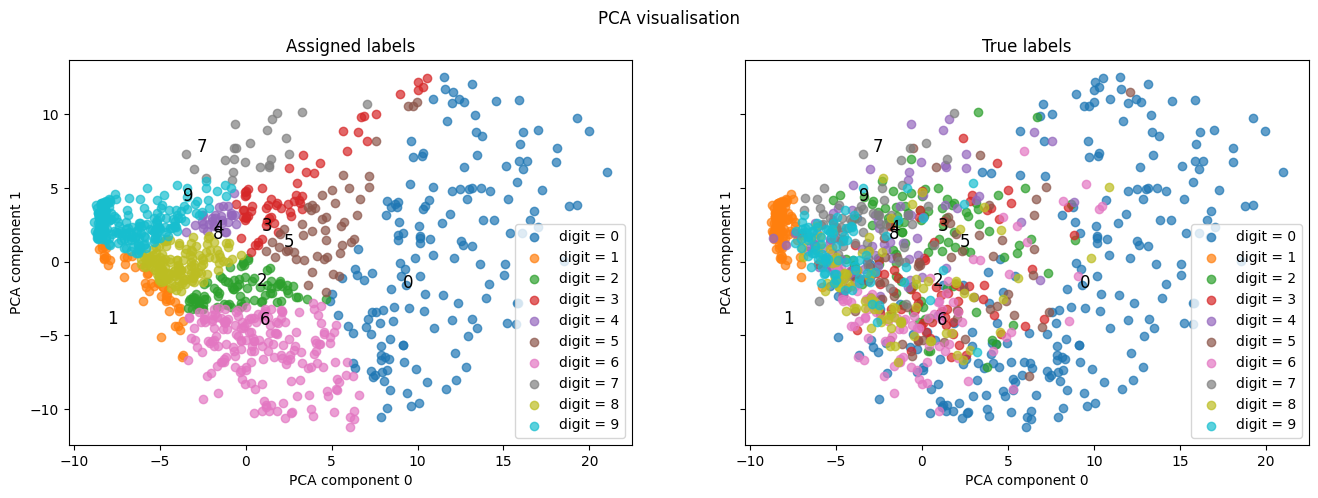

The accuraccy with 2 component UMAP is: 0.012
[(5, 3,  1.324     ) (9, 7,  1.41400003) (9, 4,  1.88900006)
 (8, 3,  1.954     ) (5, 2,  2.30800009) (8, 5,  2.6170001 )
 (7, 4,  2.74799991) (6, 0,  2.88000011) (8, 2,  2.90100002)
 (3, 2,  3.15700006) (6, 5,  3.48099995) (6, 2,  4.33699989)
 (4, 2,  4.35200024) (4, 1,  4.57299995) (8, 7,  4.61999989)
 (6, 3,  4.64799976) (8, 4,  4.78900003) (2, 1,  4.79699993)
 (5, 0,  5.21700001) (9, 8,  5.39400005) (7, 2,  5.76200008)
 (9, 2,  5.84000015) (3, 0,  5.91200018) (8, 6,  6.05900002)
 (5, 4,  6.27799988) (9, 1,  6.3829999 ) (4, 3,  6.44099998)
 (7, 3,  6.57000017) (2, 0,  6.83699989) (7, 5,  6.954     )
 (5, 1,  7.02299976) (8, 1,  7.25600004) (9, 3,  7.27899981)
 (7, 1,  7.30100012) (6, 1,  7.40299988) (9, 5,  7.42600012)
 (8, 0,  7.74800014) (3, 1,  7.95200014) (6, 4,  8.64000034)
 (7, 6, 10.01200008) (9, 6, 10.17599964) (1, 0, 10.2840004 )
 (4, 0, 11.18500042) (7, 0, 12.16499996) (9, 0, 12.55000019)]


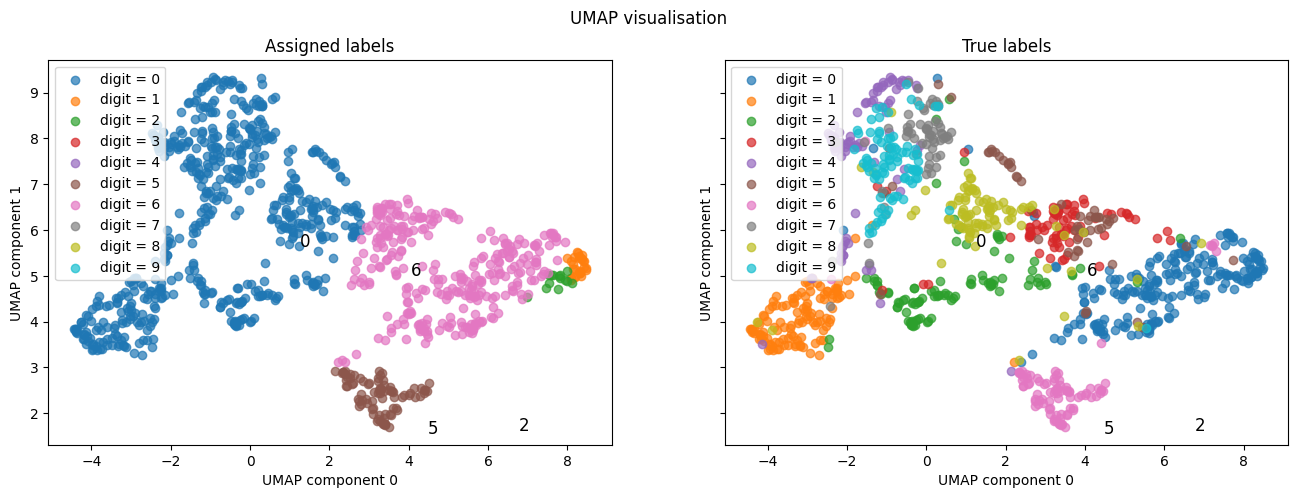

The accuraccy with 2 component T-SNE is: 0.561
[(5, 3,  2.92199993) (9, 4,  6.63500023) (9, 7, 14.54199982)
 (8, 5, 18.50900078) (8, 3, 18.5739994 ) (7, 4, 20.87199974)
 (8, 4, 23.93400002) (8, 2, 24.72599983) (9, 8, 24.81299973)
 (8, 7, 27.48200035) (6, 0, 29.29899979) (2, 1, 30.86499977)
 (3, 2, 31.07600021) (6, 2, 31.19799995) (3, 0, 32.59500122)
 (5, 2, 33.27000046) (5, 0, 34.4620018 ) (4, 2, 37.3730011 )
 (7, 5, 38.61800003) (4, 1, 39.7120018 ) (7, 3, 40.47299957)
 (6, 3, 40.47499847) (9, 5, 41.30699921) (5, 4, 41.81100082)
 (9, 2, 41.97800064) (9, 3, 42.26100159) (4, 3, 42.31700134)
 (6, 5, 43.37900162) (8, 1, 45.5340004 ) (9, 1, 46.3409996 )
 (2, 0, 47.06999969) (8, 6, 47.99700165) (8, 0, 49.3409996 )
 (7, 2, 50.14400101) (6, 1, 56.85699844) (3, 1, 59.26499939)
 (7, 1, 59.98400116) (5, 1, 60.7820015 ) (6, 4, 67.18499756)
 (9, 6, 70.72299957) (7, 0, 73.03900146) (4, 0, 73.0510025 )
 (9, 0, 74.06400299) (7, 6, 75.45899963) (1, 0, 77.66400146)]


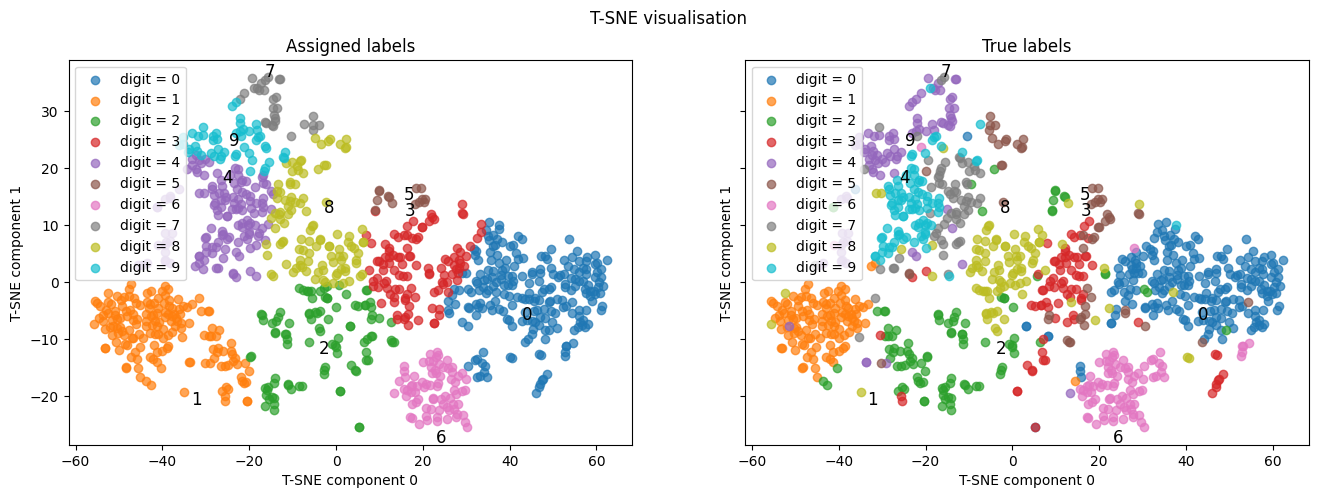

In [37]:
show_reducer_accuraccy(PCA(2), StandardScaler(), "PCA")
show_reducer_accuraccy(UMAP(), StandardScaler(), "UMAP")
show_reducer_accuraccy(TSNE(2), StandardScaler(), "T-SNE")

# Task 1.2ii: Conclusion

We expected, looking at the distance matrix, that the pairs with low distance should be close to one another.
While the pairs with a high distance should be far away from one another.
## PCA
We see in PCA that 8-4, 5-3, and 6-2 are very close together, while 1-0, 7-0, and 9-0 are far away.
This is expected looking at the dist_ij matrix.
## U-MAP
We see in U-MAP that 5-3, 9-7, and 9-4 are very close together, while 9-0, 7-0, and 4-0 are far away.
This is expected looking at the dist_ij matrix.
## T-SNE
We see in T-SNE that 5-3, 9-4, and 9-7 are very close together, while 1-0, 7-6, and 9-0 are far away.
This is expected looking at the dist_ij matrix.

# Task 1.3

In [38]:
# Create nearest mean classifier
def NM_classifier(X_test, X_train=X_train, y_train=y_train):
    """Classify all test cases in `X_test` using nearest mean of the training data `X_train` and labels `y_train`"""
    centers = [center_img(X_train, y_train, digit) for digit in range(10)]
    output = []
    for _, img in X_test.iterrows():
        distances = [dist(img, center) for center in centers]
        output.append(np.argmin(distances))
    return pd.DataFrame(output, columns=["digit"])

In [39]:
# Apply NM_classifier to all training data
y_out = NM_classifier(X_train)
acc = accuraccy(y_train, y_out)
print(f"Accuraccy of NM classifier on training data: {acc:0.3f}")

y_out = NM_classifier(X_test)
acc = accuraccy(y_test, y_out)
print(f"Accuraccy of NM classifier on testing data: {acc:0.3f}")

Accuraccy of NM classifier on training data: 0.864
Accuraccy of NM classifier on testing data: 0.804


# Task 1.4i: Setting up KNN

Accuraccy of KNN classifier on training data: 0.979
Accuraccy of KNN classifier on testing data: 0.914


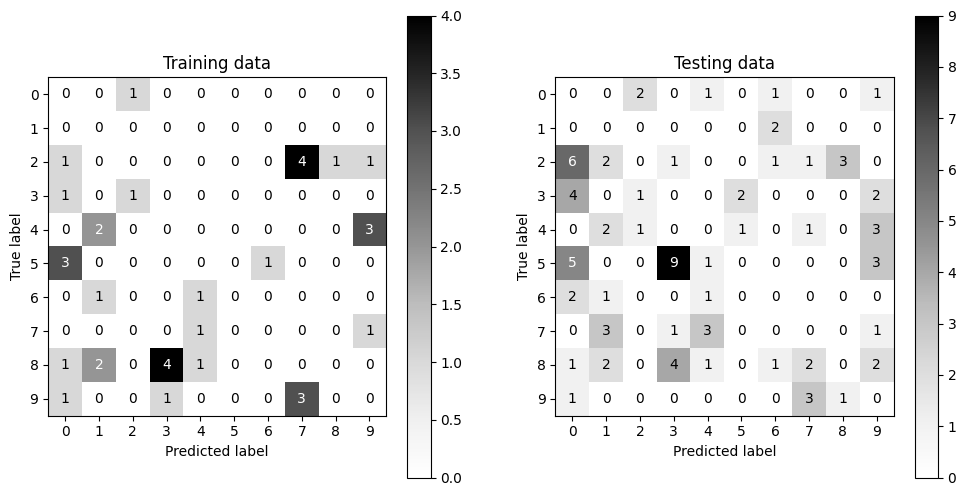

In [40]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


# Setup KNN classifier with k = 3
knn = KNeighborsClassifier(3)
knn.fit(X_train, y_train.digit)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
ax1.set_title("Training data")
ax2.set_title("Testing data")

y_out = pd.DataFrame(knn.predict(X_train.values), columns=["digit"])
acc = accuraccy(y_train, y_out)
cm = confusion_matrix(y_train, y_out)
for i in range(10):
    cm[i, i] = 0
CMD = ConfusionMatrixDisplay(cm, display_labels=list(range(10)))
CMD.plot(ax=ax1, cmap="Greys")
print(f"Accuraccy of KNN classifier on training data: {acc:0.3f}")

y_out = pd.DataFrame(knn.predict(X_test.values), columns=["digit"])
acc = accuraccy(y_test, y_out)
cm = confusion_matrix(y_test, y_out)
for i in range(10):
    cm[i, i] = 0
CMD = ConfusionMatrixDisplay(cm, display_labels=list(range(10)))
CMD.plot(ax=ax2, cmap="Greys")
print(f"Accuraccy of KNN classifier on testing data: {acc:0.3f}")

# Task 1.4ii: Confusion matrix conclusions

uhh